# Predicting Traffic Incident Severity Based on Weather and Time Factors

## 1.0 Description

The goal of this project is to develop a predictive model that can estimate the severity of traffic incidents based on various factors such as weather conditions (rain, snow, fog, etc.) and time-related elements (time of day, day of the week, and holidays). The model will utilize historical traffic incident data, weather patterns, and temporal factors to predict the likelihood of incidents leading to severe outcomes, such as injuries or fatalities, rather than minor disruptions. This will help transportation authorities, emergency services, and city planners make data-driven decisions, optimize response strategies, and improve public safety.

## 1.1 Business Understanding

Traffic incidents contribute significantly to congestion, injuries, fatalities, and economic losses. Understanding the factors that influence the severity of these incidents can help reduce the overall impact on society. By leveraging data science to predict the severity of traffic incidents based on weather and time related variables, transportation agencies can:

- ```Improve Safety```: Predicting severe incidents allows for timely interventions, such as dispatching emergency services more effectively.


- ```Optimize Resource Allocation```: Traffic management and emergency responders can allocate resources in advance based on predicted severity, ensuring quicker response times in critical situations.

- ```Enhance Traffic Management```: Better understanding of incident severity can guide traffic signal optimization, road closures, and detour planning to minimize disruptions.

- ```Promote Public Awareness```: Through predictive insights, authorities can inform drivers about weather-related risks and encourage safer driving practices during high-risk periods.

This project aims to create a solution that not only reduces the severity of traffic incidents but also improves overall traffic flow and safety.



## 1.2 Objectives

1. Data collection:  The data was sourced from https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data

2. Data cleaning

3. Exploratory Data analysis

4. Feature Engineering

5. Model development

6. Model evaluation

7. Model deployment

## 1.3 Shareholders

- ```Transportation Authorities```: Local and regional traffic management departments who would benefit from predictive tools to optimize response times and reduce traffic disruptions.

- ```Emergency Services```: Police, fire departments, and medical teams who could use severity predictions to prepare resources and prioritize high-risk incidents.
- ```City Planners and Government Agencies```: Municipal decision makers focused on infrastructure planning and public safety initiatives could use these insights to improve roadways and safety measures.

- ```Public and Drivers```: The general public will benefit indirectly through increased safety, fewer severe accidents, and enhanced traffic management.

- ```Insurance Companies```: Insurers could use severity predictions to optimize their pricing models, assess risk in real-time, and process claims more efficiently.
- ```Weather Services```: Weather data providers may collaborate for deeper insights and provide better real-time forecasts for integrating into the system.

- ```Technology Providers```: Companies providing machine learning infrastructure, cloud services, and data collection tools will play a role in the development and deployment of the model.

## 2.0 Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Suppress all warnings
warnings.filterwarnings('ignore')


In [2]:
data_path = '..\Data\Traffic_Crashes_Resulting_in_Injury_20250305.csv'
Crashes = pd.read_csv(data_path)
Crashes.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Russian Hill,2.0,CENTRAL,6.0,6.0,32.0,98.0,98.0


In [3]:
Crashes.shape

(61229, 63)

The data set has 61229 rows and 63 columns

In [4]:
Crashes.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [5]:
Crashes.describe()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_at_fault,supervisor_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,61229.000000,6.120700e+04,2.733600e+04,61062.000000,61062.000000,61229.000000,61150.000000,61226.00000,61229.000000,55163.000000,60988.000000,60994.000000,61015.000000,60998.000000,59961.000000,59961.000000
mean,35511.366183,2.585379e+07,6.975567e+06,37.765794,-122.428668,2014.421973,55.961292,0.00980,1.252903,1.013270,6.074342,5.139833,6.688732,20.635300,53.409516,53.409516
std,24558.926014,4.916555e+06,4.068037e+06,0.024442,0.028345,5.705362,263.824017,0.10161,0.699803,0.124737,2.913055,2.980160,3.365241,12.379127,32.756729,32.756729
min,1.000000,2.000600e+07,1.000000e+05,37.707459,-122.513616,2005.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15991.000000,2.385600e+07,3.454000e+06,37.748896,-122.442840,2010.000000,0.000000,0.00000,1.000000,1.000000,4.000000,3.000000,3.000000,9.000000,27.000000,27.000000
50%,31878.000000,2.493400e+07,7.301000e+06,37.772526,-122.421464,2014.000000,0.000000,0.00000,1.000000,1.000000,6.000000,4.000000,7.000000,20.000000,46.000000,46.000000
75%,48413.000000,2.669600e+07,1.015675e+07,37.783824,-122.408359,2019.000000,51.000000,0.00000,1.000000,1.000000,9.000000,8.000000,10.000000,34.000000,86.000000,86.000000
max,89186.000000,5.436600e+07,1.999910e+07,37.829991,-122.358328,2024.000000,26400.000000,4.00000,19.000000,5.000000,11.000000,10.000000,11.000000,41.000000,117.000000,117.000000


In [6]:
Crashes['collision_severity'].nunique

<bound method IndexOpsMixin.nunique of 0        Injury (Complaint of Pain)
1        Injury (Complaint of Pain)
2            Injury (Other Visible)
3        Injury (Complaint of Pain)
4        Injury (Complaint of Pain)
                    ...            
61224        Injury (Other Visible)
61225        Injury (Other Visible)
61226    Injury (Complaint of Pain)
61227    Injury (Complaint of Pain)
61228        Injury (Other Visible)
Name: collision_severity, Length: 61229, dtype: object>

In [7]:
Crashes_selected = Crashes[['tb_latitude','tb_longitude','collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc']]
Crashes_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,...,control_device,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,...,None,0.0,1,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,...,None,0.0,1,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,...,None,0.0,2,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,...,Functioning,0.0,1,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,...,Not Stated,0.0,1,NaN,Driver,North,Not Stated,Pedestrian,West,Not Stated


In [8]:
Crashes_selected.isna().sum()

tb_latitude                 167
tb_longitude                167
collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party_at_fault             6066
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
dtype: int64

In [9]:
Crashes_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tb_latitude              61062 non-null  float64
 1   tb_longitude             61062 non-null  float64
 2   collision_date           61229 non-null  object 
 3   collision_time           61169 non-null  object 
 4   accident_year            61229 non-null  int64  
 5   month                    61229 non-null  object 
 6   day_of_week              61220 non-null  object 
 7   primary_rd               61229 non-null  object 
 8   secondary_rd             61087 non-null  object 
 9   distance                 61150 non-null  float64
 10  direction                61228 non-null  object 
 11  weather_1                61229 non-null  object 
 12  collision_severity       61229 non-null  object 
 13  type_of_collision        61229 non-null  object 
 14  mviw                  

In [10]:

from sklearn.impute import SimpleImputer


numeric_cols = ['party_at_fault', 'distance', 'number_killed']
imputer = SimpleImputer(strategy='median')  # use median
Crashes_selected[numeric_cols] = imputer.fit_transform(Crashes_selected[numeric_cols])

# Impute categorical columns with 'Unknown' or 'Most Frequent'
categorical_cols = ['party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc']
Crashes_selected[categorical_cols] = Crashes_selected[categorical_cols].fillna('Unknown')

# For small missing data, impute with mode
Crashes_selected['day_of_week'] = Crashes_selected['day_of_week'].fillna(Crashes_selected['day_of_week'].mode()[0])

# Drop rows with small missing data
Crashes_selected= Crashes_selected.dropna(subset=['secondary_rd','tb_latitude', 'tb_longitude','collision_date', 'collision_time', 'party1_type', 'party1_dir_of_travel','party1_move_pre_acc','dph_col_grp_description','direction'])



In [11]:
Crashes_selected.isna().sum()

tb_latitude                0
tb_longitude               0
collision_date             0
collision_time             0
accident_year              0
month                      0
day_of_week                0
primary_rd                 0
secondary_rd               0
distance                   0
direction                  0
weather_1                  0
collision_severity         0
type_of_collision          0
mviw                       0
ped_action                 0
road_surface               0
road_cond_1                0
lighting                   0
dph_col_grp_description    0
control_device             0
number_killed              0
number_injured             0
party_at_fault             0
party1_type                0
party1_dir_of_travel       0
party1_move_pre_acc        0
party2_type                0
party2_dir_of_travel       0
party2_move_pre_acc        0
dtype: int64

### Checking for Outliers

In [12]:
outliers_multiple_columns = pd.DataFrame()


exclude_columns = ['number_injured', 'number_killed']

for col in Crashes_selected.select_dtypes(include=['float64', 'int64']).columns:
    
    if col not in exclude_columns:
        Q1 = Crashes_selected[col].quantile(0.25)
        Q3 = Crashes_selected[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = Crashes_selected[(Crashes_selected[col] < lower_bound) | (Crashes_selected[col] > upper_bound)]
        outliers_multiple_columns[col] = outliers[col]

# Calculate the sum of outliers for each column (excluding 'number_injured' and 'number_killed')
outliers_multiple_columns.sum()


tb_latitude            0.000000
tb_longitude     -214378.190337
accident_year          0.000000
distance          211870.000000
party_at_fault        20.000000
dtype: float64

### Caping outliers

In [13]:
for col in outliers_multiple_columns.columns:
    Q1 = Crashes_selected[col].quantile(0.25)
    Q3 = Crashes_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the upper and lower bounds
    Crashes_selected[col] = np.where(Crashes_selected[col] < lower_bound, lower_bound, Crashes_selected[col])
    Crashes_selected[col] = np.where(Crashes_selected[col] > upper_bound, upper_bound, Crashes_selected[col])


- For the first line, it checks if each value in Crashes_selected[col] is less than the lower_bound. If true, it replaces the value with the lower_bound; otherwise, it keeps the original value.

- For the second line, it checks if each value in Crashes_selected[col] is greater than the upper_bound. If true, it replaces the value with the upper_bound; otherwise, it keeps the original value.

###  Convert all column names to lowercase

In [14]:
# Convert all column names to lowercase
Crashes_selected.columns = Crashes_selected.columns.str.lower()


### Converting collision_date and collision_time to datetime

In [15]:
Crashes_selected['collision_date'] =pd.to_datetime(Crashes_selected['collision_date'])
Crashes_selected['collision_time'] = pd.to_datetime(Crashes_selected['collision_time']) 


### Converting columns with many repeated values to categorical

In [16]:
categorical_columns = [ 'month', 'day_of_week',
    'direction', 'weather_1', 'collision_severity', 
    'type_of_collision', 'mviw', 'ped_action', 'road_surface', 'road_cond_1', 'lighting',
    'dph_col_grp_description', 'control_device', 'party1_type', 'party1_dir_of_travel',
    'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc'
]
Crashes_selected[categorical_columns] = Crashes_selected[categorical_columns].apply(lambda x: x.astype('category'))


### converting the entries in the collision_severity column into simplified labels like Pain, Visible, Severe, Fatal, and Medical.

In [17]:

severity_mapping = {
    'Injury (Complaint of Pain)': 'Pain',
    'Injury (Other Visible)': 'Visible',
    'Injury (Severe)': 'Severe',
    'Fatal': 'Fatal',
    'Medical': 'Medical'
}

# Apply the mapping to the 'collision_severity' column
Crashes_selected['collision_severity'] = Crashes_selected['collision_severity'].replace(severity_mapping)

print(Crashes_selected['collision_severity'].value_counts())


Pain       38781
Visible    17317
Severe      4272
Fatal        577
Medical        1
Name: collision_severity, dtype: int64


### cleaning the column collision_severity

In [18]:
#Drop rows where 'collision_severity' is 'Medical'
Crashes_selected = Crashes_selected[Crashes_selected['collision_severity'] != 'Medical']

### Cleaning the column Weather_1

In [19]:
# Replace less informative or rare values with a more general category
Crashes_selected['weather_1'] = Crashes_selected['weather_1'].replace({
    'Other: Unknown': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: MISTING': 'Other',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog',
    'Snowing': 'Snow',  # Grouping different snow-related entries
    'Wind': 'Windy',  # Grouping wind-related values
})

# o drop values with very low frequency (e.g., 1 or 2 occurrences)
# Count the frequency of each value in the column
value_counts = Crashes_selected['weather_1'].value_counts()

# Filter out values that appear only once or twice and replace them with 'Other'
Crashes_selected['weather_1'] = Crashes_selected['weather_1'].apply(lambda x: x if value_counts[x] > 2 else 'Other')

# Check the cleaned column
print(Crashes_selected['weather_1'].value_counts())


Clear         50215
Cloudy         5927
Raining        3603
Not Stated      655
Fog             261
Other           237
Windy            49
Name: weather_1, dtype: int64


### cleaning column direction

In [20]:

Crashes_selected['direction'] = Crashes_selected['direction'].replace({
    'North Nor': 'North',
})

# Optional: Group 'Not Stated'
Crashes_selected['direction'] = Crashes_selected['direction'].replace({
    'Not Stated': 'Unknown',
})


# Check the cleaned column
print(Crashes_selected['direction'].value_counts())


Unknown    33693
South       7380
West        6766
East        6696
North       6412
Name: direction, dtype: int64


In [21]:
Crashes_selected['lighting'].value_counts()

Daylight                                39316
Dark - Street Lights                    18364
Dusk - Dawn                              2134
Not Stated                                592
Dark - No Street Lights                   433
Dark - Street Lights Not Functioning      108
Name: lighting, dtype: int64

In [22]:

Crashes_selected['lighting'] = Crashes_selected['lighting'].replace({
    'Dark - Street Lights Not Functioning': 'Dark',  
    'Dark - No Street Lights': 'Dark',  
    'Not Stated': 'Unknown',  
})

#merge 'Dusk - Dawn' with 'Daylight'
Crashes_selected['lighting'] = Crashes_selected['lighting'].replace({
    'Dusk - Dawn': 'Daylight',  
})

# Check the cleaned column
print(Crashes_selected['lighting'].value_counts())


Daylight                41450
Dark - Street Lights    18364
Unknown                   592
Dark                      541
Name: lighting, dtype: int64


### Univariate analysis

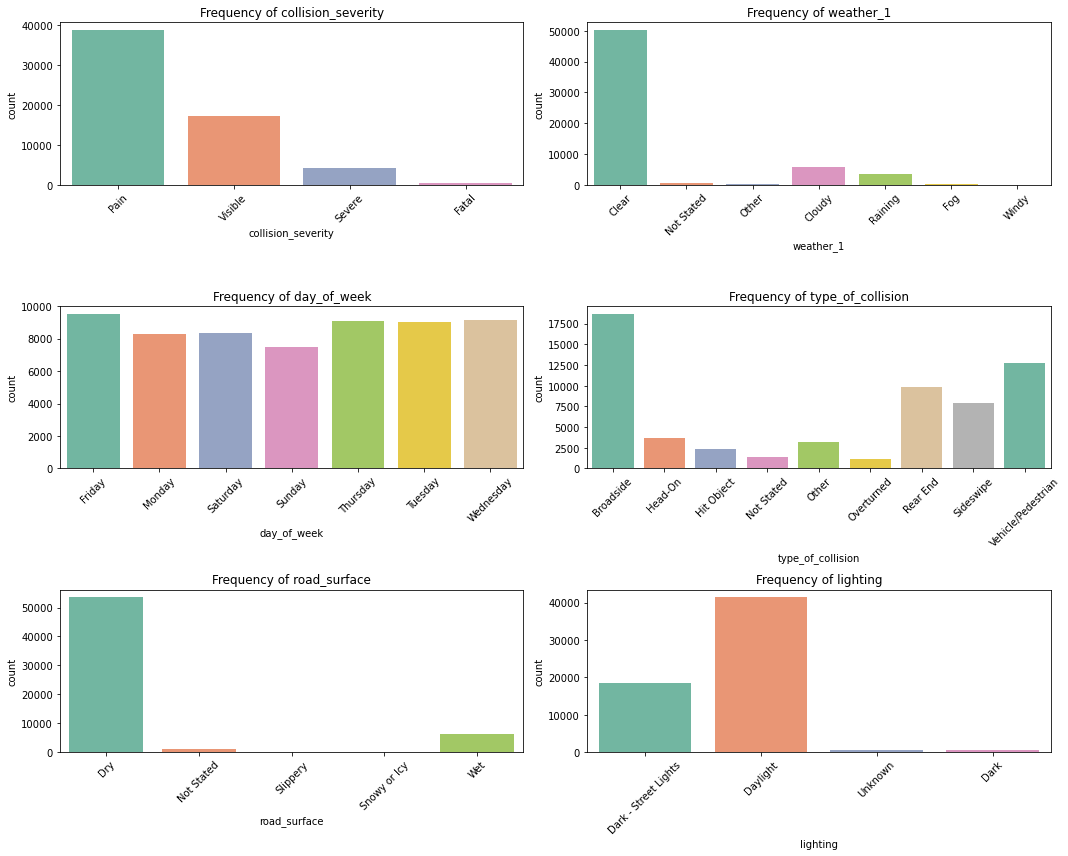

In [23]:
# Bar plot for categorical columns

categorical_columns = ['collision_severity', 'weather_1', 'day_of_week', 'type_of_collision', 'road_surface', 'lighting']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=Crashes_selected[col], palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


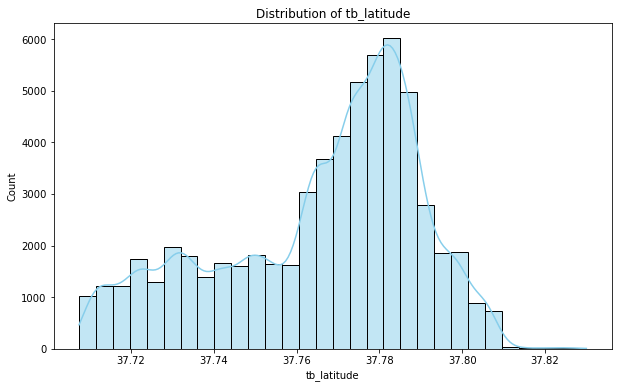

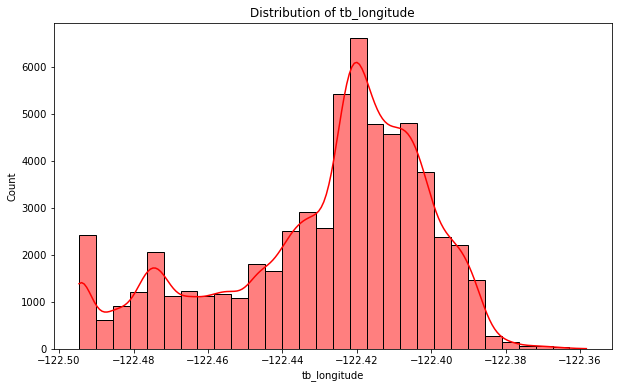

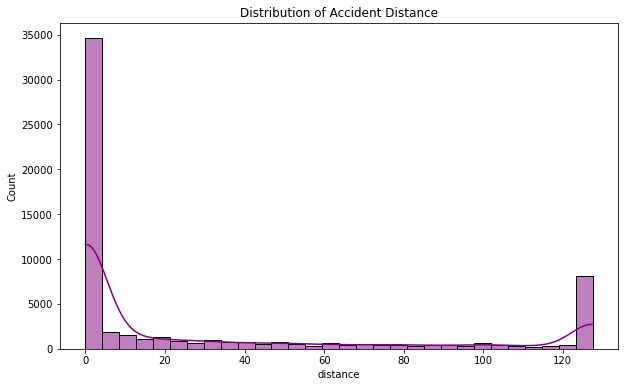

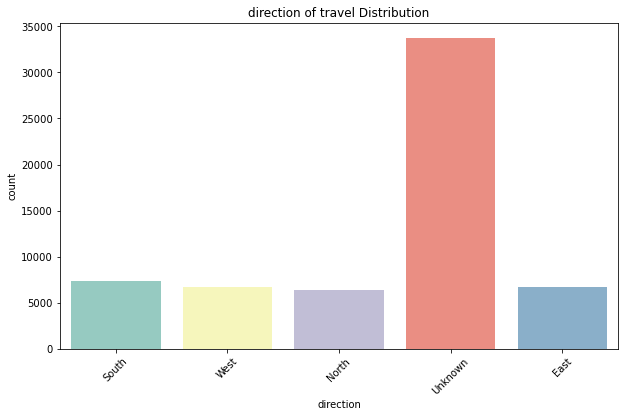

In [24]:
# tb_latitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['tb_latitude'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of tb_latitude')
plt.show()

# tb_longitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['tb_longitude'], kde=True, bins=30, color='red')
plt.title('Distribution of tb_longitude')
plt.show()


# Distance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['distance'], kde=True, bins=30, color='purple')
plt.title('Distribution of Accident Distance')
plt.show()

# Weather Condition Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='direction', data=Crashes_selected, palette='Set3')
plt.title('direction of travel Distribution')
plt.xticks(rotation=45)
plt.show()


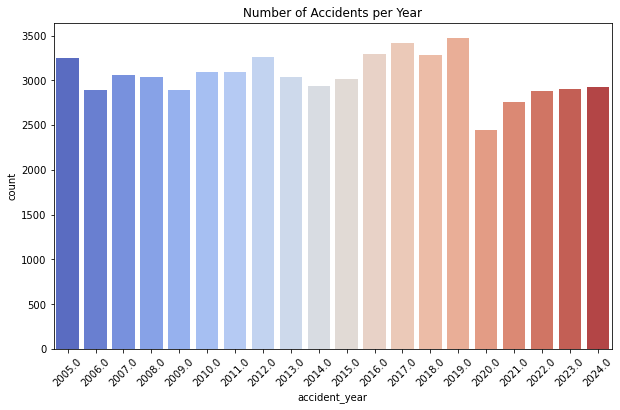

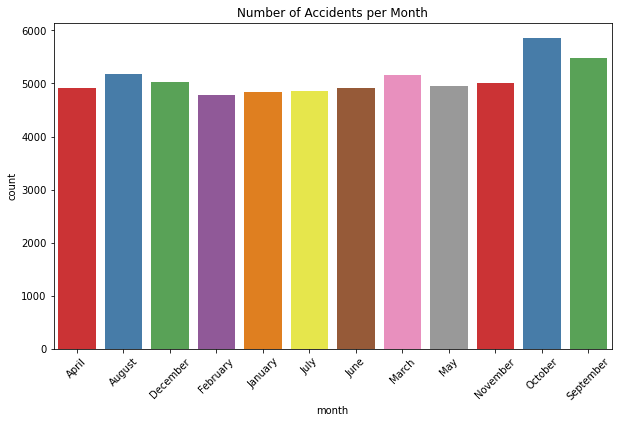

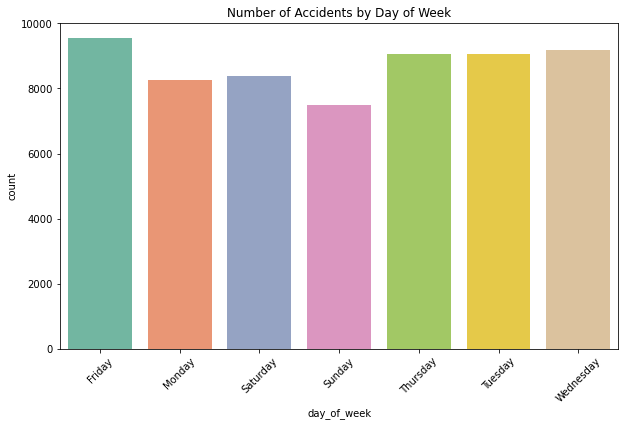

In [25]:
# Distribution of accidents over the year
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['accident_year'], palette='coolwarm')
plt.title('Number of Accidents per Year')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['month'], palette='Set1')
plt.title('Number of Accidents per Month')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['day_of_week'], palette='Set2')
plt.title('Number of Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()


### Bivariate distribution

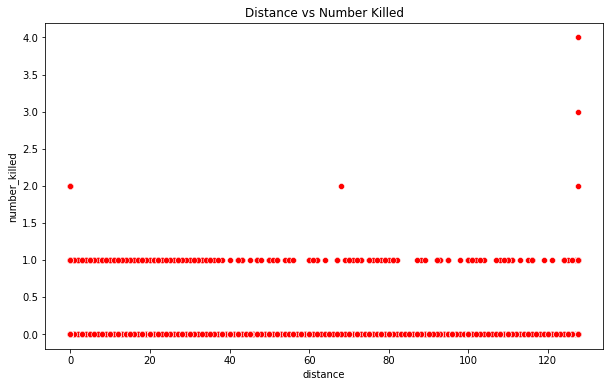

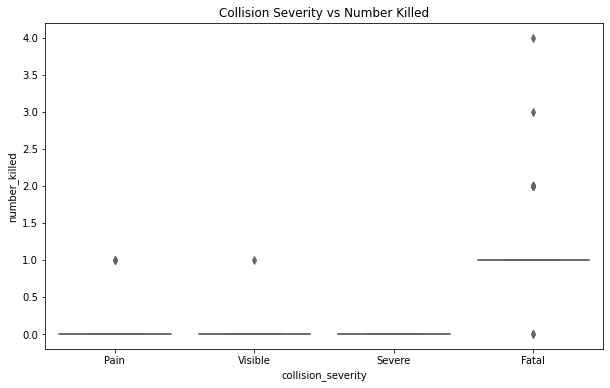

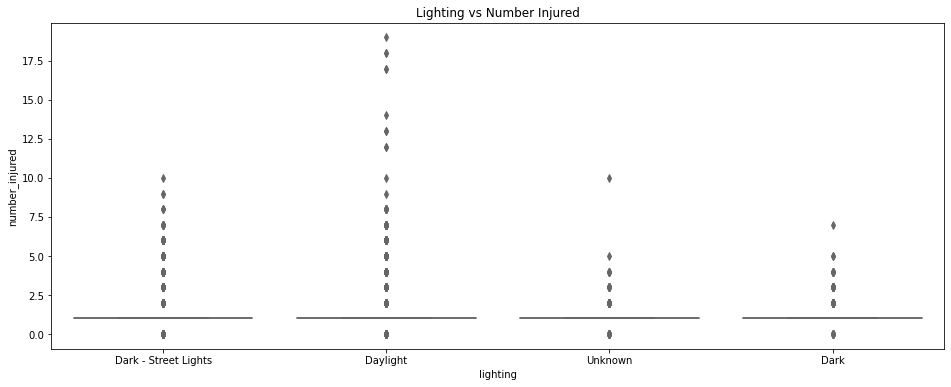

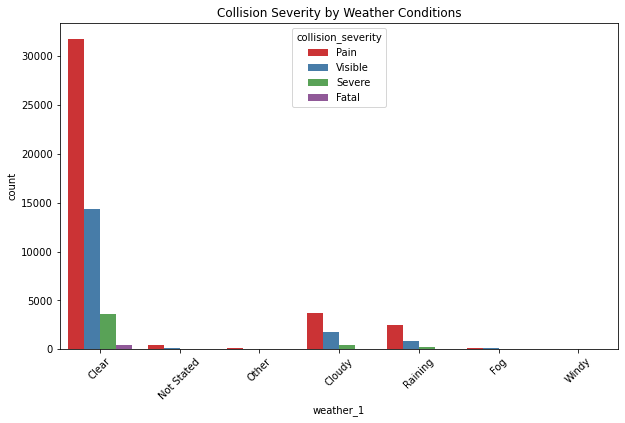

In [26]:
# Distance vs Number Killed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='number_killed', data=Crashes_selected, color='red')
plt.title('Distance vs Number Killed')
plt.show()

# Collision Severity vs Number Killed
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_killed', data=Crashes_selected, palette='coolwarm')
plt.title('Collision Severity vs Number Killed')
plt.show()

# Lighting vs Number Injured
plt.figure(figsize=(16, 6))
sns.boxplot(x='lighting', y='number_injured', data=Crashes_selected, palette='coolwarm')
plt.title('Lighting vs Number Injured')
plt.show()

# weather and collision severity
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_1', hue='collision_severity', data=Crashes_selected, palette='Set1')
plt.title('Collision Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()


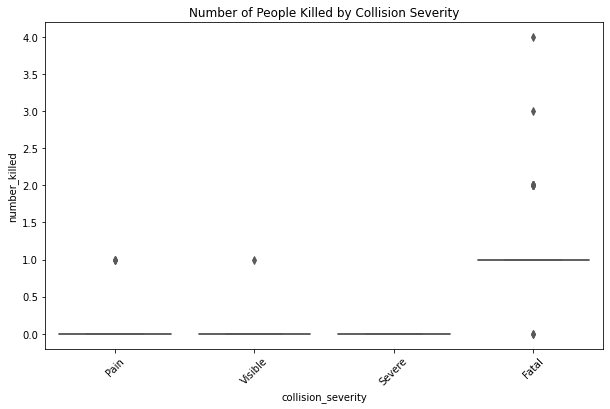

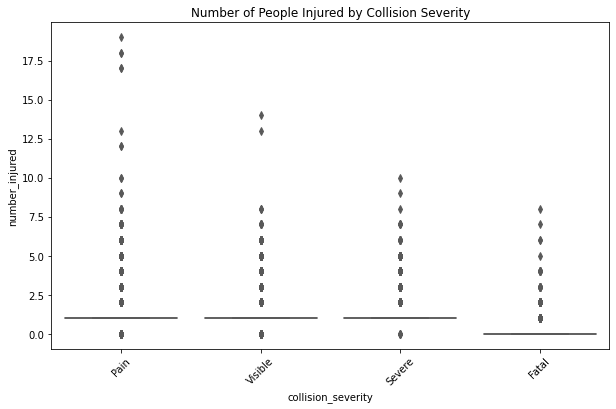

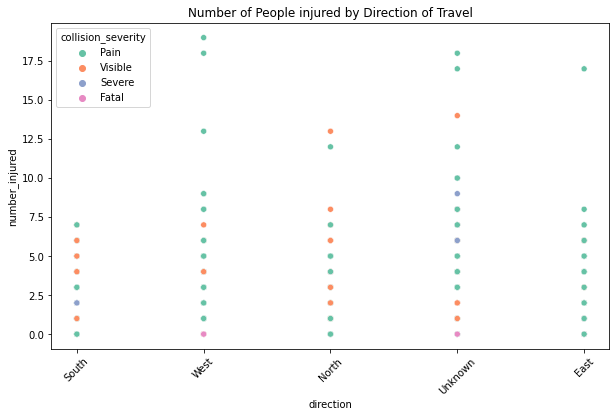

In [27]:
# Box plot for number of killed by collision severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_killed', data=Crashes_selected, palette='Set2')
plt.title('Number of People Killed by Collision Severity')
plt.xticks(rotation=45)
plt.show()

# Box plot for number of injured by collision severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_injured', data=Crashes_selected, palette='Set2')
plt.title('Number of People Injured by Collision Severity')
plt.xticks(rotation=45)
plt.show()

# direction and number of people killed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='direction', y='number_injured', data=Crashes_selected, hue='collision_severity', palette='Set2')
plt.title('Number of People injured by Direction of Travel')
plt.xticks(rotation=45)
plt.show()


### Multivariate Analysis

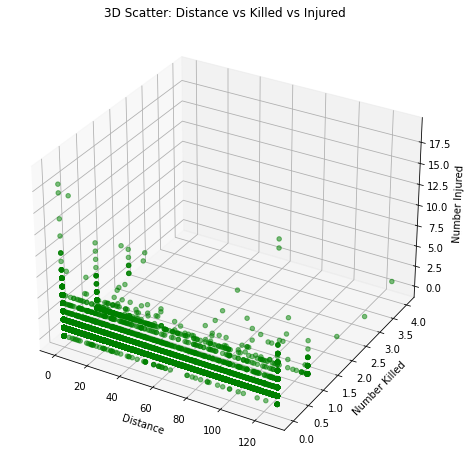

In [28]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Crashes_selected['distance'], Crashes_selected['number_killed'], Crashes_selected['number_injured'], alpha=0.5, color='green')
ax.set_xlabel('Distance')
ax.set_ylabel('Number Killed')
ax.set_zlabel('Number Injured')
plt.title('3D Scatter: Distance vs Killed vs Injured')
plt.show()

In [29]:
Crashes_selected = Crashes[['tb_latitude','tb_longitude','collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc']]
Crashes_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,...,control_device,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,...,None,0.0,1,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,...,None,0.0,1,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,...,None,0.0,2,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,...,Functioning,0.0,1,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,...,Not Stated,0.0,1,NaN,Driver,North,Not Stated,Pedestrian,West,Not Stated


In [30]:
Crashes_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tb_latitude              61062 non-null  float64
 1   tb_longitude             61062 non-null  float64
 2   collision_date           61229 non-null  object 
 3   collision_time           61169 non-null  object 
 4   accident_year            61229 non-null  int64  
 5   month                    61229 non-null  object 
 6   day_of_week              61220 non-null  object 
 7   primary_rd               61229 non-null  object 
 8   secondary_rd             61087 non-null  object 
 9   distance                 61150 non-null  float64
 10  direction                61228 non-null  object 
 11  weather_1                61229 non-null  object 
 12  collision_severity       61229 non-null  object 
 13  type_of_collision        61229 non-null  object 
 14  mviw                  

In [ ]:
# Droping columns 
Crashes_selected1 = Crashes_selected.drop(columns=['tb_latitude','tb_longitude','control_device','collision_date','collision_time','primary_rd','secondary_rd','direction','ped_action','road_surface','road_cond_1','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc'])
Crashes_selected1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accident_year            61229 non-null  int64  
 1   month                    61229 non-null  object 
 2   day_of_week              61220 non-null  object 
 3   distance                 61150 non-null  float64
 4   weather_1                61229 non-null  object 
 5   collision_severity       61229 non-null  object 
 6   type_of_collision        61229 non-null  object 
 7   mviw                     61229 non-null  object 
 8   lighting                 61229 non-null  object 
 9   dph_col_grp_description  61228 non-null  object 
 10  number_killed            61226 non-null  float64
 11  number_injured           61229 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 5.6+ MB


In [ ]:
# Separating the categorical and numerical columns
categorical_data = Crashes_selected1.drop(columns =['accident_year','number_killed','number_injured','distance'])
categorical_data.head()

,month,day_of_week,weather_1,collision_severity,type_of_collision,mviw,lighting,dph_col_grp_description
0,January,Wednesday,Clear,Injury (Complaint of Pain),Overturned,Fixed Object,Dark - Street Lights,Vehicle(s) Only Involved
1,February,Wednesday,Clear,Injury (Complaint of Pain),Other,Bicycle,Daylight,Bicycle Only
2,November,Sunday,Clear,Injury (Other Visible),Hit Object,Fixed Object,Daylight,Vehicle(s) Only Involved
3,July,Friday,Clear,Injury (Complaint of Pain),Broadside,Bicycle,Daylight,Vehicle-Bicycle
4,May,Thursday,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,Not Stated,Vehicle-Pedestrian


In [43]:
numeric_data = Crashes_selected1[['accident_year','number_killed','number_injured','distance']]
numeric_data.head()

,accident_year,number_killed,number_injured,distance
0,2023,0.0,1,68.0
1,2023,0.0,1,20.0
2,2007,0.0,2,210.0
3,2019,0.0,1,0.0
4,2017,0.0,1,0.0


<AxesSubplot:>

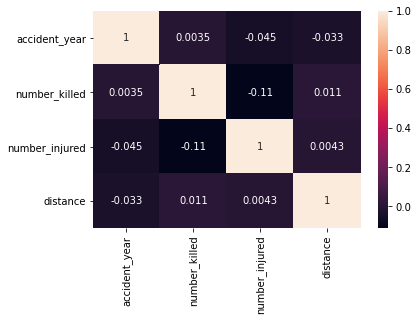

In [ ]:
# Using the numerical columns to explore correlations since the correlation is only useful for quantitative variables. 
# Correlation shows they relate to each other.Because regression techniques represent the relationship in which the independent variable affects the dependent variable, 
# the weight for that variable in the regression formula may vary depending on the direction and strength of the correlation.

corr = numeric_data.corr()
sns.heatmap(corr,annot = True)

The formula used to calculate the correlation above is the pearson correlation coefficient that shows the linear relationship between two variables. 1 means a perfect positive linear correlation, -1 means that there is a perfect negative correlation and 0 meand thet there is no linear correlation. the graph above shows that the variable that shows the strongest linear with number killed is number injured though a negative relationship.

It is recommended that we use the pair plot together with the correlation graph to comprehensively investigate correlation between variables.The pairplot provided by the seaborn library visualizes and shows the correlation of seach variable below:

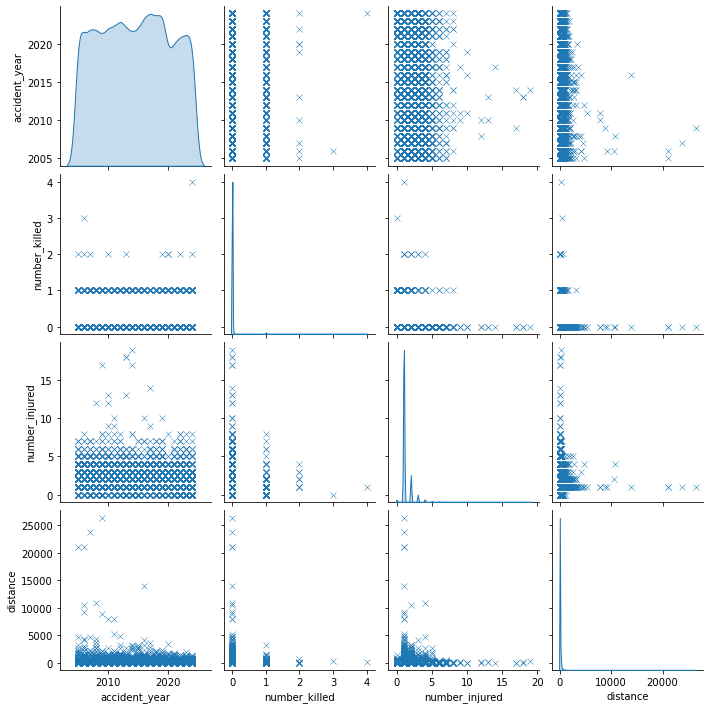

In [45]:
sns.pairplot(numeric_data,markers = 'x',diag_kind= 'kde')

Lookingg at the pairplot we can see that most of the data is skewed to the left rater than evenly distributed.

We can therefore visualize the distribution through a histogram.

array([[<AxesSubplot:title={'center':'accident_year'}>,
        <AxesSubplot:title={'center':'number_killed'}>],
       [<AxesSubplot:title={'center':'number_injured'}>,
        <AxesSubplot:title={'center':'distance'}>]], dtype=object)

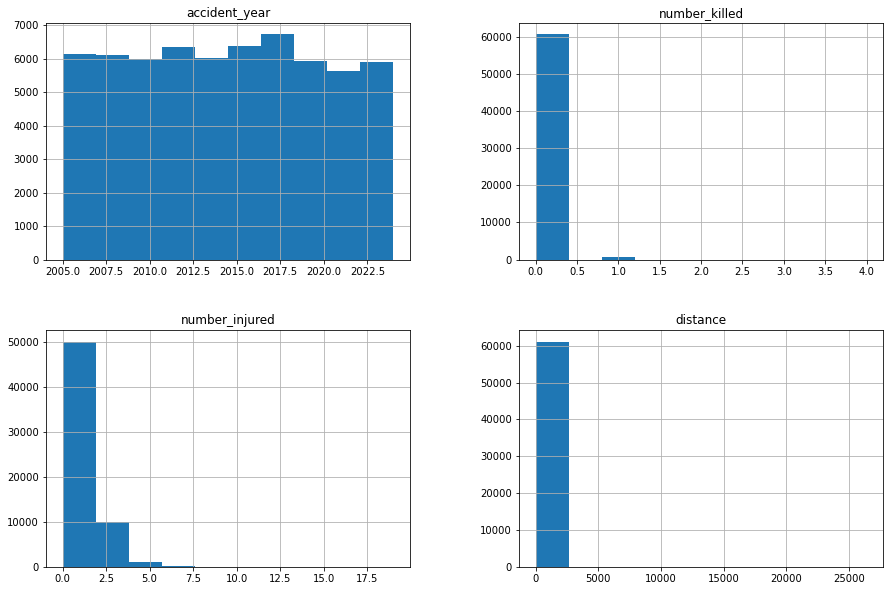

In [46]:
numeric_data.hist(figsize=(15,10))

Logistic regression is an appropriate regression technique for a data closer to a normal distribution therefore data shown above isn't appropriate for applying it. 

We can apply the Log Transformation to bring such extreme data close to a normal distribution.

array([[<AxesSubplot:title={'center':'accident_year'}>,
        <AxesSubplot:title={'center':'number_killed'}>],
       [<AxesSubplot:title={'center':'number_injured'}>,
        <AxesSubplot:title={'center':'distance'}>]], dtype=object)

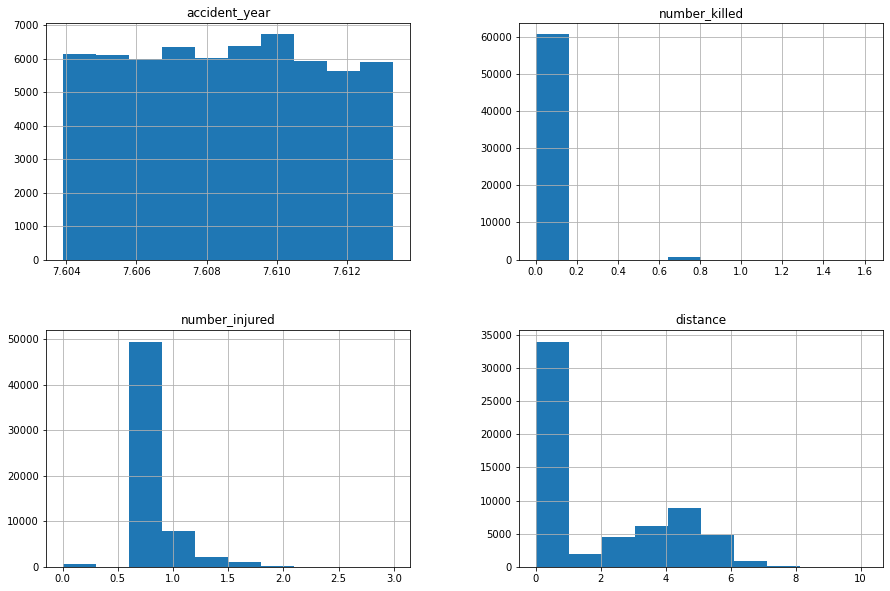

In [ ]:
numeric_data_log = np.log(numeric_data +1) #Since the values of 0 and 1 return negative values we add 1 to the whole data and apply the function
numeric_data_log.hist(figsize=(15,10))

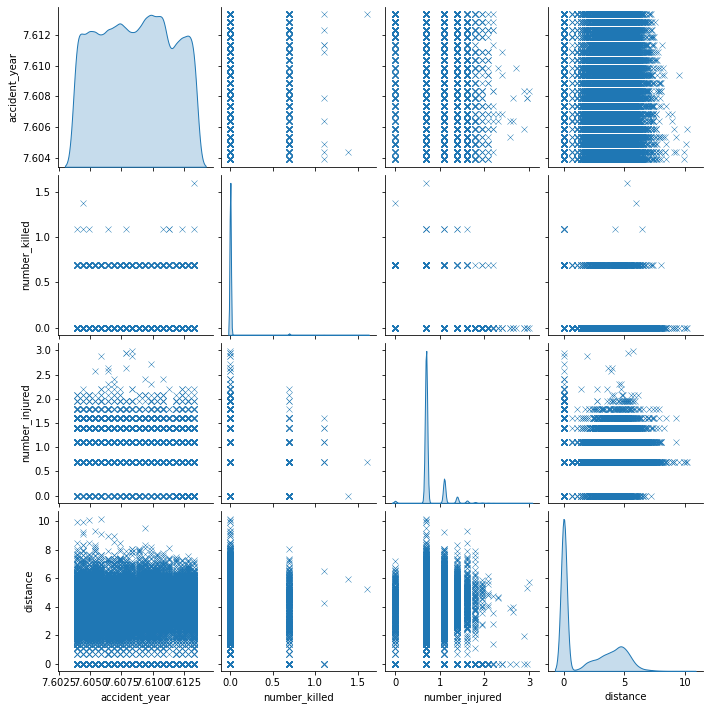

In [48]:
sns.pairplot(numeric_data_log,markers = 'x',diag_kind= 'kde')

<AxesSubplot:>

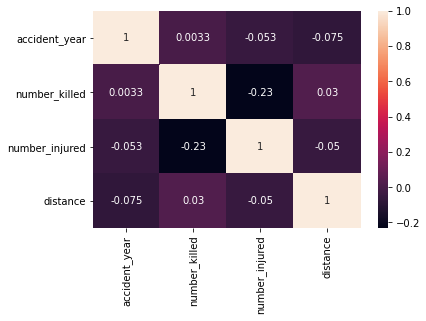

In [49]:
corr = numeric_data_log.corr()
sns.heatmap(corr,annot = True)

In [55]:
# Combine Categorical data and the numeric_data_log in preparation of hot one coding
combined_df = pd.concat([categorical_data , numeric_data_log], axis=1) 
combined_df

,month,day_of_week,weather_1,collision_severity,type_of_collision,mviw,lighting,dph_col_grp_description,accident_year,number_killed,number_injured,distance
0,January,Wednesday,Clear,Injury (Complaint of Pain),Overturned,Fixed Object,Dark - Street Lights,Vehicle(s) Only Involved,7.612831,0.0,0.693147,4.234107
1,February,Wednesday,Clear,Injury (Complaint of Pain),Other,Bicycle,Daylight,Bicycle Only,7.612831,0.0,0.693147,3.044522
2,November,Sunday,Clear,Injury (Other Visible),Hit Object,Fixed Object,Daylight,Vehicle(s) Only Involved,7.604894,0.0,1.098612,5.351858
3,July,Friday,Clear,Injury (Complaint of Pain),Broadside,Bicycle,Daylight,Vehicle-Bicycle,7.610853,0.0,0.693147,0.000000
4,May,Thursday,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,Not Stated,Vehicle-Pedestrian,7.609862,0.0,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
61224,July,Saturday,Clear,Injury (Other Visible),Rear End,Pedestrian,Daylight,Bicycle-Pedestrian,7.612831,0.0,1.098612,3.044522
61225,May,Saturday,Clear,Injury (Other Visible),Broadside,Other Motor Vehicle,Daylight,Vehicle(s) Only Involved,7.613325,0.0,1.098612,0.000000
61226,October,Sunday,Clear,Injury (Complaint of Pain),Broadside,Pedestrian,Daylight,Vehicle-Pedestrian,7.610358,0.0,0.693147,0.000000
61227,June,Saturday,Clear,Injury (Complaint of Pain),Sideswipe,Other Motor Vehicle,Daylight,Vehicle(s) Only Involved,7.611842,0.0,0.693147,0.000000


In [ ]:
#One Hot Encoding the categorical columns ready for modeling
combined_df_encoded = pd.get_dummies(combined_df, columns=['dph_col_grp_description','month', 'day_of_week', 'weather_1','type_of_collision', 'mviw', 'lighting'], drop_first=True)
combined_df_encoded.head()

,collision_severity,accident_year,number_killed,number_injured,distance,dph_col_grp_description_Bicycle-Parked Car,dph_col_grp_description_Bicycle-Pedestrian,dph_col_grp_description_Bicycle-Unknown/Not Stated,dph_col_grp_description_Pedestrian Only or Pedestrian-Parked Car,dph_col_grp_description_Unknown/Not Stated,...,mviw_Other Motor Vehicle,mviw_Other Object,mviw_Parked Motor Vehicle,mviw_Pedestrian,mviw_Train,lighting_Dark - Street Lights,lighting_Dark - Street Lights Not Functioning,lighting_Daylight,lighting_Dusk - Dawn,lighting_Not Stated
0,Injury (Complaint of Pain),7.612831,0.0,0.693147,4.234107,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Injury (Complaint of Pain),7.612831,0.0,0.693147,3.044522,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Injury (Other Visible),7.604894,0.0,1.098612,5.351858,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Injury (Complaint of Pain),7.610853,0.0,0.693147,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Injury (Complaint of Pain),7.609862,0.0,0.693147,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
